In [ ]:
# Download YOLOv7 repository and install requirements
!git clone https://github.com/WongKinYiu/yolov9
%cd yolov9
!pip install -r requirements.txt

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197
Receiving objects: 100% (1197/1197), 74.23 MiB | 25.20 MiB/s, done.
Resolving deltas: 100% (519/519), done.
/content/yolov7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 29.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-m

In [ ]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Setup complete. Using torch 2.2.1+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)


In [ ]:
%cd /content

!curl -L "https://app.roboflow.com/ds/ZCwOYJLruw?key=SjV4l9bmj5" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/images/net-15913-_jpg.rf.75082298d5b5a9b0b1712a00812d9219.jpg  
 extracting: train/images/net-15913-_jpg.rf.770724e6d700b187c98c2ca8c2aac529.jpg  
 extracting: train/images/net-15914-_jpg.rf.2554fb485f7b0114093cb2f03f9c5408.jpg  
 extracting: train/images/net-15914-_jpg.rf.4a003effc1222e794c08f6131c6378f9.jpg  
 extracting: train/images/net-15915-_jpg.rf.913125fa6b7750c9839dce5028861e3c.jpg  
 extracting: train/images/net-15920-_jpg.rf.9695c2333ded5c55131fc09a43346912.jpg  
 extracting: train/images/net-15922-_jpg.rf.a787fdbee26d89ce37cee4672cf34c10.jpg  
 extracting: train/images/net-15924-_jpg.rf.24ecd3db19a4bdd84814e0d0d30f7277.jpg  
 extracting: train/images/net-15924-_jpg.rf.e801fabae642505e22048497ff86d831.jpg  
 extracting: train/images/net-15925-_jpg.rf.8681e1ac080ee599e701c5f7bd0d9f5d.jpg  
 extracting: train/images/net-15925-_jpg.rf.fb9ff05ddda970acabd25fb6e72b9c3e.jpg  
 extracting: train/images/net-15927-

In [ ]:
%cat data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['Box']

roboflow:
  workspace: project-9tdw1
  project: box-6500images
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/project-9tdw1/box-6500images/dataset/1

In [ ]:
import os
import copy
import random
import json
import yaml
import glob
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import requests
from zipfile import ZipFile
import argparse
from PIL import Image
import PIL.Image
import shutil
from IPython.display import Image
from sklearn.model_selection import train_test_split
import torch
import torch.utils.data
from torch import nn
import torchvision
from ultralytics import YOLO
from torchvision import transforms as T
from pycocotools import mask as coco_mask
from pycocotools.coco import COCO

In [ ]:
model = YOLO("yolov9c.yaml")
model = YOLO("yolov9c.pt")

100%|██████████| 49.4M/49.4M [00:00<00:00, 274MB/s]


In [ ]:
project = "yolov9_dataset/results"
name = "10_epochs-"

In [ ]:

results = model.train(
    data = os.path.join( "/content/data.yaml"),
    project = project,
    name = name,
    epochs = 10,
    patience = 0 , #setting patience=0 to disable early stopping,
    batch = 4,
)

Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=/content/data.yaml, epochs=10, time=None, patience=0, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=yolov9_dataset/results, name=10_epochs-2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

train: Scanning /content/train/labels.cache... 3188 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3188/3188 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/valid/labels.cache... 390 images, 0 backgrounds, 0 corrupt: 100%|██████████| 390/390 [00:00<?, ?it/s]


Plotting labels to yolov9_dataset/results/10_epochs-2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to yolov9_dataset/results/10_epochs-2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.46G     0.8521     0.8928      1.199         63        640: 100%|██████████| 797/797 [04:29<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:11<00:00,  4.27it/s]

                   all        390       6566      0.776      0.718      0.789      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.26G     0.8625      0.807      1.213         85        640: 100%|██████████| 797/797 [04:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:11<00:00,  4.41it/s]


                   all        390       6566      0.863      0.793      0.874       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.24G     0.8064     0.7256      1.175         40        640: 100%|██████████| 797/797 [04:14<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.47it/s]


                   all        390       6566      0.873      0.802      0.888      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.19G     0.7482     0.6608      1.137         54        640: 100%|██████████| 797/797 [04:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:11<00:00,  4.39it/s]


                   all        390       6566      0.881      0.822      0.901       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.27G     0.7024     0.5952      1.106         49        640: 100%|██████████| 797/797 [04:14<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.85it/s]


                   all        390       6566      0.906      0.837      0.917      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.24G     0.6701     0.5557      1.081         82        640: 100%|██████████| 797/797 [04:10<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:09<00:00,  5.11it/s]

                   all        390       6566      0.898      0.859      0.928      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.25G     0.6379     0.5241      1.056         60        640: 100%|██████████| 797/797 [04:08<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.84it/s]


                   all        390       6566      0.921      0.851      0.931      0.784

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.27G     0.6095     0.4755      1.038         68        640: 100%|██████████| 797/797 [04:11<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:09<00:00,  5.30it/s]


                   all        390       6566      0.927      0.854      0.938      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.24G     0.5807     0.4391       1.02         77        640: 100%|██████████| 797/797 [04:10<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:09<00:00,  5.00it/s]

                   all        390       6566      0.937      0.872       0.95       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.27G     0.5592     0.4075     0.9977         60        640: 100%|██████████| 797/797 [04:11<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:11<00:00,  4.39it/s]

                   all        390       6566      0.932      0.884      0.953      0.826



10 epochs completed in 0.755 hours.
Optimizer stripped from yolov9_dataset/results/10_epochs-2/weights/last.pt, 51.6MB
Optimizer stripped from yolov9_dataset/results/10_epochs-2/weights/best.pt, 51.6MB

Validating yolov9_dataset/results/10_epochs-2/weights/best.pt...
Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25320019 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:18<00:00,  2.60it/s]


                   all        390       6566      0.928       0.89      0.953      0.826
Speed: 0.4ms preprocess, 20.3ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to yolov9_dataset/results/10_epochs-2


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:

inference_model = YOLO('/content/drive/MyDrive/10_epochs-2/weights/best.pt')


image 1/1 /content/box.png: 480x640 5 Boxs, 526.6ms
Speed: 3.1ms preprocess, 526.6ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2


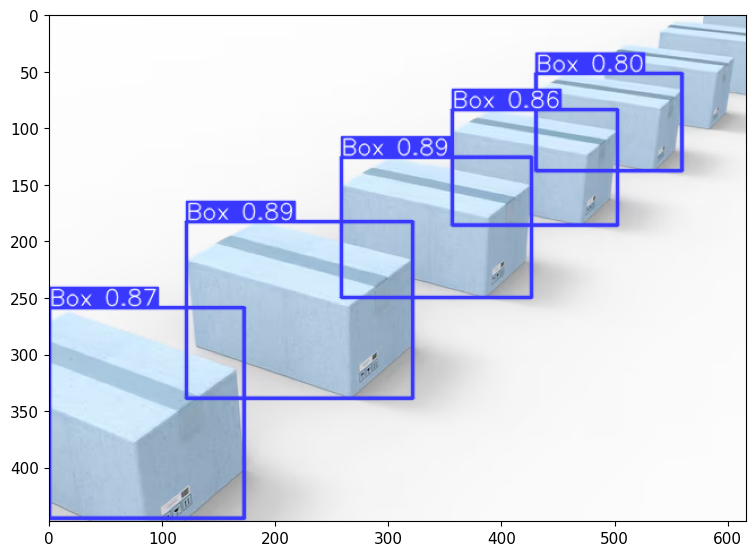

In [ ]:

%matplotlib inline
inference_img_path = "/content/box.png"
inference_result = inference_model.predict(inference_img_path,conf=0.7,save=True)

inference_result_array = inference_result[0].plot()
plt.figure(figsize=(9,9))
plt.imshow(inference_result_array)
plt.show()
